------------------------
score [0.5        0.9        0.96666667 0.93333333 1.         0.93333333
 0.93333333 1.         0.9        0.65517241]
score 0.872183908045977
------------------------
Score:  0.8533333333333334
Confusion Matrix:
[[33  6]
 [ 5 31]]
Classification Report:
              precision    recall  f1-score   support

  Not Stroke       0.87      0.85      0.86        39
      Stroke       0.84      0.86      0.85        36

    accuracy                           0.85        75
   macro avg       0.85      0.85      0.85        75
weighted avg       0.85      0.85      0.85        75

------------------------------
area under curve (auc):  0.8536324786324786


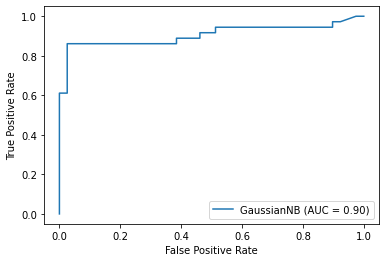

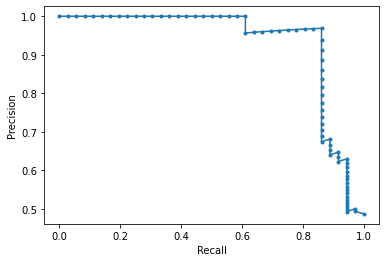

After applying PCA, score is:  0.6741071428571429


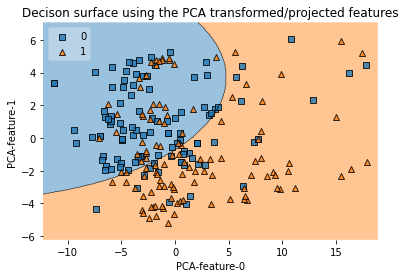

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
from sklearn import decomposition
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score

df = pd.read_excel('data.xlsx')

# perform ordinal encoding for ordinal features
enc = preprocessing.OrdinalEncoder(dtype=int)
enc.fit(df[["Age", "What is your normal blood pressure?", "What is work intensity?", "How many hours do you work on average?",
           "Do you feel starved for company?"]])
df[["Age", "What is your normal blood pressure?", "What is work intensity?", "How many hours do you work on average?",
           "Do you feel starved for company?"]] = enc.transform(df[["Age", "What is your normal blood pressure?",
                                                                    "What is work intensity?",
                                                                    "How many hours do you work on average?",
                                                                    "Do you feel starved for company?"]])

# print(enc.categories_)

data = df.to_numpy()

# splitting labels
target = data[:, 18]
# removing timestamps column
data = data[:, 1:18]

# performing binarization of target
target[target == 'Yes'] = 1
target[target == 'No'] = 0

# performing binarization on data
temp = data[:, 0]
temp[temp == "Male"] = 1
temp[temp == "Female"] = 0

temp = data[:, 5:12]
temp[temp == "Yes"] = 1
temp[temp == "No"] = 0

temp = data[:, 16]
temp[temp == "Yes"] = 1
temp[temp == "No"] = 0

# calculate BMI from height and weight
data[:, 2] = data[:, 2] / 3.281
data[:, 2] = np.square(data[:, 2])
data[:, 2] = data[:, 3] / data[:, 2]
data = np.delete(data, 3, 1)

# print(data[:10, :])
# print(target)


#x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=42)


# use euclidean distance with k=5 having equal weights for all nearest neighbors
gnb = GaussianNB()

target = target.astype('int')
scores = cross_val_score(gnb, data, target, cv=10)
print('------------------------')
print('score', scores)
print('score', scores.mean())
print('------------------------')
y_train = y_train.astype('int')
y_test = y_test.astype('int')

gnb.fit(x_train, y_train)
gnb.predict(x_test)


print('Score: ', gnb.score(x_test, y_test))
print('Confusion Matrix:')
print(confusion_matrix(y_test, gnb.predict(x_test)))
print('Classification Report:')
print(classification_report(y_test, gnb.predict(x_test), target_names=['Not Stroke', 'Stroke']))
print("------------------------------")

print("area under curve (auc): ", metrics.roc_auc_score(y_test, gnb.predict(x_test)))

#ROC curve
metrics.plot_roc_curve(gnb, x_test, y_test)
plt.show()

#precision_recall_curve 
probs = gnb.predict_proba(x_test)
probs = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, probs)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# dimensionality reduction for displaying the decision boundary
pca = decomposition.PCA(n_components=2)
pca.fit(x_train)
X = pca.transform(x_train)
#knn = KNeighborsClassifier()
gnb.fit(X, y_train)
print('After applying PCA, score is: ', gnb.score(X, y_train))

plot_decision_regions(X, y_train, clf=gnb, legend=2)

# Adding axes annotations
plt.xlabel('PCA-feature-0')
plt.ylabel('PCA-feature-1')
plt.title('Decison surface using the PCA transformed/projected features')
plt.show()


------------------------
score [0.46666667 0.86666667 0.96666667 0.93333333 0.96666667 0.96666667
 0.86666667 1.         0.8        0.5862069 ]
score 0.8419540229885056
------------------------
Score:  0.8533333333333334
Confusion Matrix:
[[33  6]
 [ 5 31]]
Classification Report:
              precision    recall  f1-score   support

  Not Stroke       0.87      0.85      0.86        39
      Stroke       0.84      0.86      0.85        36

    accuracy                           0.85        75
   macro avg       0.85      0.85      0.85        75
weighted avg       0.85      0.85      0.85        75

------------------------------
area under curve (auc):  0.8536324786324786


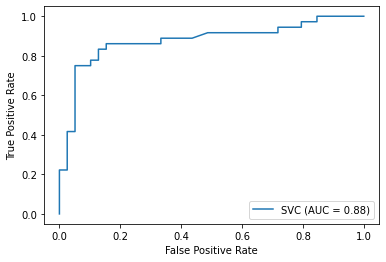

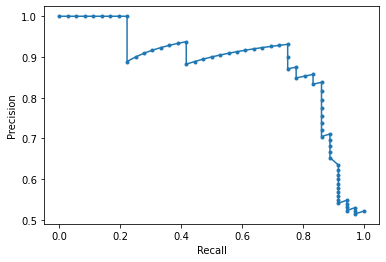

After applying PCA, score is:  0.6696428571428571


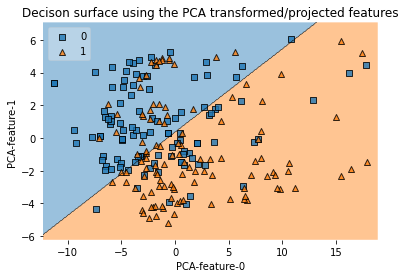

In [35]:
svclassifier = svm.SVC(kernel='linear', probability=True)

target = target.astype('int')
scores = cross_val_score(svclassifier, data, target, cv=10)
print('------------------------')
print('score', scores)
print('score', scores.mean())
print('------------------------')
y_train = y_train.astype('int')
y_test = y_test.astype('int')

svclassifier.fit(x_train, y_train)
svclassifier.predict(x_test)

print('Score: ', svclassifier.score(x_test, y_test))
print('Confusion Matrix:')
print(confusion_matrix(y_test, svclassifier.predict(x_test)))
print('Classification Report:')
print(classification_report(y_test, svclassifier.predict(x_test), target_names=['Not Stroke', 'Stroke']))
print("------------------------------")
print("area under curve (auc): ", metrics.roc_auc_score(y_test, svclassifier.predict(x_test)))

#ROC curve
metrics.plot_roc_curve(svclassifier,x_test, y_test)
plt.show()

#precision_recall_curve 
probs = svclassifier.predict_proba(x_test)
probs = probs[:, 1]
precision, recall, thresholds = precision_recall_curve( y_test, probs)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# dimensionality reduction for displaying the decision boundary
pca = decomposition.PCA(n_components=2)
pca.fit(x_train)
X = pca.transform(x_train)
#knn = KNeighborsClassifier()
svclassifier.fit(X, y_train)
print('After applying PCA, score is: ', svclassifier.score(X, y_train))

plot_decision_regions(X, y_train, clf=svclassifier, legend=2)

# Adding axes annotations
plt.xlabel('PCA-feature-0')
plt.ylabel('PCA-feature-1')
plt.title('Decison surface using the PCA transformed/projected features')
plt.show()